<a href="https://colab.research.google.com/github/ChaesongYun/Tensorflow/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%B0%B0%EC%B6%94%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

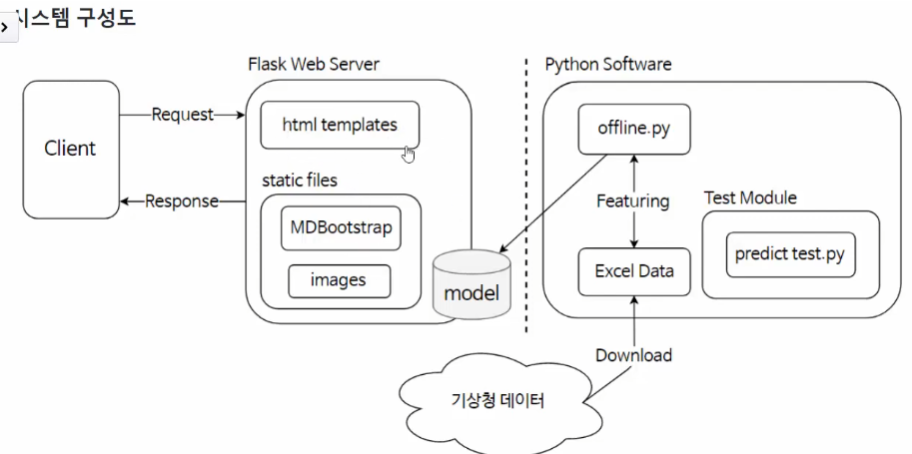

- 날씨자료: 기상자료개방포털<br>
  배추가격: 농산물유통정보사이트

## 다변인 선형회귀
- 모델에 영향을 미치는 변인이 여러 개일 때 사용하는 모델
- 현재 우리 데이터에서는 변인이 '평균온도', '최저온도', '최고온도', '걍수량'<br>
-> 이 모든 변인이 '가격'에 영향을 미친다고 감안한다
- 따라서 가중치(Weight)을 고려했을 때 다음과 같은 수식을 세울 수 있다<br>
```py
H(x1, x2, x3, x4) = x1*w1 + x2*w2 + x3*w3 + x4*w4
```
행렬의 곱을 이용하면 다음과 같이 간단하게 표현 가능함
```py
H(X) = X*W
```


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
from pandas.io.parsers import read_csv

model = tf.global_variables_initializer()

data = read_csv('/content/drive/MyDrive/Tensorflow/price.csv', sep=',')

xy = np.array(data, dtype=np.float32)

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = xy[:, 1:-1] # 모든열 + 평균, 최저, 최고온도, 강수량 가져오기
y_data = xy[:, [-1]] # 모든열 + 평균 가격 가져오기

In [3]:
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
# random_normal(): 랜덤으로 표준분포에 다라 값을 배정하고 싶을 때 사용
# [,] 안에 만들고 싶은 행렬 수 지정/ 평균(mean=)/ 편차(stddev=) 순으로 입력
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [4]:
# tf.matmul(): 행렬 곱
hypothesis = tf.matmul(X, W) + b

In [6]:
cost = tf.reduce_mean(tf.square(hypothesis-Y))

In [7]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
# cost가 최소치일 때
train = optimizer.minimize(cost)

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
for step in range(100001):
  cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
  if step % 500 == 0:
    print("#", step, " 손실비용: ", cost_)
    print("-배추가격: ", hypo_[0])

# 0  손실비용:  12595033.0
-배추가격:  [5.299135]
# 500  손실비용:  4189246.0
-배추가격:  [-272.74478]
# 1000  손실비용:  3783895.2
-배추가격:  [36.77149]
# 1500  손실비용:  3467252.0
-배추가격:  [318.7663]
# 2000  손실비용:  3218185.0
-배추가격:  [569.3098]
# 2500  손실비용:  3021804.0
-배추가격:  [791.90436]
# 3000  손실비용:  2866724.0
-배추가격:  [989.7206]
# 3500  손실비용:  2744131.0
-배추가격:  [1165.5544]
# 4000  손실비용:  2647148.0
-배추가격:  [1321.8776]
# 4500  손실비용:  2570383.8
-배추가격:  [1460.8732]
# 5000  손실비용:  2509595.8
-배추가격:  [1584.4758]
# 5500  손실비용:  2461439.2
-배추가격:  [1694.4004]
# 6000  손실비용:  2423273.5
-배추가격:  [1792.1676]
# 6500  손실비용:  2393011.0
-배추가격:  [1879.1272]
# 7000  손실비용:  2369002.2
-배추가격:  [1956.4778]
# 7500  손실비용:  2349941.5
-배추가격:  [2025.2837]
# 8000  손실비용:  2334797.0
-배추가격:  [2086.4915]
# 8500  손실비용:  2322751.0
-배추가격:  [2140.9417]
# 9000  손실비용:  2313157.8
-배추가격:  [2189.3804]
# 9500  손실비용:  2305505.8
-배추가격:  [2232.473]
# 10000  손실비용:  2299390.0
-배추가격:  [2270.8105]
# 10500  손실비용:  2294490.0
-배추가격:  [2304.9177]
# 11000  손실비용:  

In [11]:
saver = tf.train.Saver()
save_path = saver.save(sess, "/content/drive/MyDrive/Tensorflow/saved.cpkt")
print("저장 완료!")

저장 완료!


In [12]:
saver = tf.train.Saver()
model = tf.global_variables_initializer()

In [13]:
avg_temp = float(input('평균온도: '))
min_temp = float(input('최저온도: '))
max_temp = float(input('최고온도: '))
rain_fall = float(input('강수량: '))

평균온도: 15.5
최저온도: 3.5
최고온도: 20.5
강수량: 5


In [16]:
with tf.Session() as sess:
  sess.run(model)

  save_path = "/content/drive/MyDrive/Tensorflow/saved.cpkt"
  saver.restore(sess, save_path)

  data = ((avg_temp, min_temp, max_temp, rain_fall), )
  arr = np.array(data, dtype=np.float32)

  x_data = arr[0:4]
  dict = sess.run(hypothesis, feed_dict={X: x_data})
  print(dict[0])

[4518.399]
